# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


646

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

temp=[]
city=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
maxtemp=[]
windspeed=[]
counter =0

print('Beginning Data Retrieval\n-----------------------------')
for i in range(len(cities)):
    counter = counter +1
    try:
        print(f"Processing Record {i} |{cities[i]}")
    
        # Build query URL
        query_url = f"{url}appid={api_key}&units={units}&q={cities[i]}" 

        # Get weather data and convert to json file
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
    
        #appeding to list of city and temp
        temp.append(weather_json["main"]["temp"])
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        maxtemp.append(weather_json["main"]["temp_max"])
        windspeed.append(weather_json["wind"]["speed"])
        
        
    except(KeyError, IndexError):
         print(f"City not found....... Skipping...........{cities[i]}")
    if counter == 60:
        time.sleep(60)
        counter = 0
        
print("-----------------------------\nData Retrieval Complete\n-----------------------------")   

Beginning Data Retrieval
-----------------------------
Processing Record 0 |mujiayingzi
Processing Record 1 |hermanus
Processing Record 2 |uaua
Processing Record 3 |souillac
Processing Record 4 |mastung
Processing Record 5 |cape town
Processing Record 6 |krasnovishersk
Processing Record 7 |bredasdorp
Processing Record 8 |cayenne
Processing Record 9 |kodiak
Processing Record 10 |mar del plata
Processing Record 11 |khoy
Processing Record 12 |moron
Processing Record 13 |korla
City not found....... Skipping...........korla
Processing Record 14 |mys shmidta
City not found....... Skipping...........mys shmidta
Processing Record 15 |kapaa
Processing Record 16 |nam tha
City not found....... Skipping...........nam tha
Processing Record 17 |ushuaia
Processing Record 18 |albany
Processing Record 19 |saldanha
Processing Record 20 |kaitangata
Processing Record 21 |lebu
Processing Record 22 |vaini
Processing Record 23 |houma
Processing Record 24 |soyo
Processing Record 25 |lavrentiya
Processing Reco

Processing Record 215 |nuevo casas grandes
Processing Record 216 |mehamn
Processing Record 217 |holme
Processing Record 218 |diu
Processing Record 219 |sitka
Processing Record 220 |sorland
Processing Record 221 |tual
Processing Record 222 |alta floresta
Processing Record 223 |cockburn town
Processing Record 224 |kavieng
Processing Record 225 |ternitz
Processing Record 226 |changping
Processing Record 227 |guerrero negro
Processing Record 228 |nome
Processing Record 229 |ulaanbaatar
Processing Record 230 |imbituva
Processing Record 231 |iqaluit
Processing Record 232 |sakaiminato
Processing Record 233 |bardiyah
City not found....... Skipping...........bardiyah
Processing Record 234 |tura
Processing Record 235 |ramnagar
Processing Record 236 |yasothon
Processing Record 237 |komsomolskiy
Processing Record 238 |shangrao
Processing Record 239 |tevaitoa
Processing Record 240 |atar
Processing Record 241 |attawapiskat
City not found....... Skipping...........attawapiskat
Processing Record 242 |

Processing Record 433 |leshukonskoye
Processing Record 434 |weligama
Processing Record 435 |hihifo
City not found....... Skipping...........hihifo
Processing Record 436 |constantine
Processing Record 437 |uruguaiana
Processing Record 438 |port lavaca
Processing Record 439 |mahon
Processing Record 440 |saint-louis
Processing Record 441 |touros
Processing Record 442 |meyungs
City not found....... Skipping...........meyungs
Processing Record 443 |shelburne
Processing Record 444 |sinnamary
Processing Record 445 |turukhansk
Processing Record 446 |talnakh
Processing Record 447 |margate
Processing Record 448 |xunchang
Processing Record 449 |hammerfest
Processing Record 450 |quatre cocos
Processing Record 451 |dingle
Processing Record 452 |shitanjing
Processing Record 453 |bonthe
Processing Record 454 |plainview
Processing Record 455 |kamyshin
Processing Record 456 |sebinkarahisar
Processing Record 457 |mount hagen
Processing Record 458 |mamallapuram
Processing Record 459 |valparaiso
Processin

# Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [4]:
new_df ={}
new_df.update({"City Name":city})
new_df.update({"Temp":temp})
new_df.update({"Cloudiness": cloudiness})
new_df.update({"Country": country})
new_df.update({"Date":date})
new_df.update({"Humidity":humidity})
new_df.update({"Latitud":lat})
new_df.update({"Longitud":lng})
new_df.update({"Max Temp":maxtemp})
new_df.update({"Wind Speed":windspeed})

new_df= pd.DataFrame(new_df)
new_df

,City Name,Temp,Cloudiness,Country,Date,Humidity,Latitud,Longitud,Max Temp,Wind Speed
0,Mujiayingzi,38.37,0,CN,1571097590,21,42.12,118.78,38.37,4.06
1,Hermanus,61.45,60,ZA,1571097159,90,-34.42,19.24,62.01,3.00
2,Uaua,73.38,42,BR,1571097595,72,-9.84,-39.48,73.38,19.00
3,Souillac,57.07,97,FR,1571097230,93,45.60,-0.60,57.99,13.87
4,Mastung,53.87,0,PK,1571097596,33,29.80,66.85,53.87,2.43
...,...,...,...,...,...,...,...,...,...,...
574,Sumy,53.28,0,UA,1571098350,77,50.91,34.80,53.28,6.94
575,Sinazongwe,79.57,0,ZM,1571098350,37,-17.26,27.46,79.57,10.26
576,Limbe,65.77,85,MW,1571098350,85,-15.81,35.05,65.77,5.15
577,Goba,47.32,98,ET,1571098351,90,7.01,39.97,47.32,4.23


In [5]:
time_stamp = pd.to_datetime(date[0], unit = 's')
new_date = time_stamp.strftime('%b/%d/%Y')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

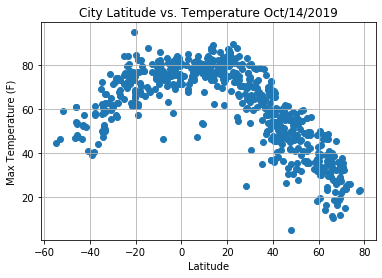

In [6]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitud"], new_df["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature " + new_date)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVs.TemperaturePlot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

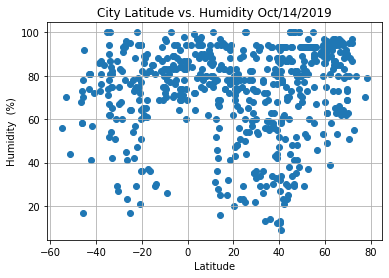

In [7]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitud"], new_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + new_date)
plt.ylabel("Humidity  (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVs.HumidityPlot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

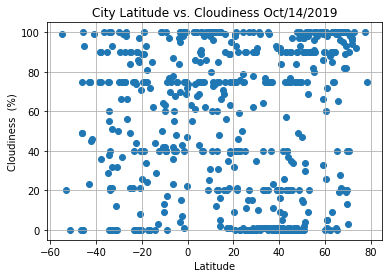

In [8]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitud"], new_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + new_date)
plt.ylabel("Cloudiness  (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVs.CloudinessPlot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

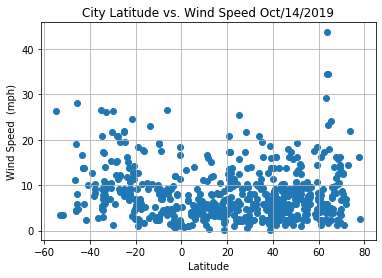

In [9]:
# Build a scatter plot for each data type
plt.scatter(new_df["Latitud"], new_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed "+ new_date)
plt.ylabel("Wind Speed  (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVs.WindSpeedPlot.png")

# Show plot
plt.show()